# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.


## Problem Statement

This project work on the Starbucks's Dataset, which mimics how consumers make purchasing decisions and how promotional offers influence those decisions.

Buy-one-get-one (BOGO), discount, and informational offers are the three sorts of offers that can be sent.

We'll split client data based on several criteria and examine their behavior in response to various offers.

In the Data Analysis section of this project, we'll examine the data and try to answer the following questions:

* What is the age ranges for starbucks customer?
* Is the subscription program useful and used by customers?
* What is the gender distribution for Starbucks customers?
* What is the relationship between the customer attributes?
* What age group affects Starbucks can income? 
* What is the age and gender distribution in Starbucks customers?
* What is the average age of Starbucks customers?
* What is the average income of Starbucks customers?
* What is the number of Starbucks customers over the year?
* What is the preferred offer type for Starbucks customers?
* What is the offer event and gender distribution in Starbucks customers?

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import json
from sklearn import preprocessing
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

### Portfolio cleanup

In [2]:
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [3]:
#apply one hot encoding to channels column
portfolio['web'] = portfolio['channels'].apply(lambda x: 1 if 'web' in x else 0)
portfolio['email'] = portfolio['channels'].apply(lambda x: 1 if 'email' in x else 0)
portfolio['mobile'] = portfolio['channels'].apply(lambda x: 1 if 'mobile' in x else 0)
portfolio['social'] = portfolio['channels'].apply(lambda x: 1 if 'social' in x else 0)

In [4]:
portfolio

,channels,difficulty,duration,id,offer_type,reward,web,email,mobile,social
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,0,1,1,1
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,1,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,1,0
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,1,0,0
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,0,1,1,1
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,1,0


In [5]:
portfolio = portfolio.drop('channels', axis=1)

In [6]:
portfolio

,difficulty,duration,id,offer_type,reward,web,email,mobile,social
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,0,1,1,1
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,1,0
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,1,0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,1,0,0
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,0,1,1,1
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,1,0


In [7]:
portfolio.isna().sum()

difficulty    0
duration      0
id            0
offer_type    0
reward        0
web           0
email         0
mobile        0
social        0
dtype: int64

### Profile cleanup

In [8]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [9]:
profile.isna().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [10]:
#NaN values in age column encoded as 118
profile['age'] = profile['age'].apply(lambda x: np.nan if x == 118 else x)
# drop all missing values
profile.dropna(inplace=True)

In [11]:
#change the date's format
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d') 
profile['start_year'] = profile.became_member_on.dt.year
profile.head()

,age,became_member_on,gender,id,income,start_year
1,55.0,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017
3,75.0,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017
5,68.0,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.0,2018
8,65.0,2018-02-09,M,389bc3fa690240e798340f5a15918d5c,53000.0,2018
12,58.0,2017-11-11,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017


In [12]:
#set age ranges 
profile['age_group'] = pd.cut(profile.age, [18, 30, 40, 50, 60,100],
                              labels = ['18 - 29', '30 - 39', '40 - 49', '50 - 59', '60+'] ,include_lowest = True)

### Transcript cleanup

In [13]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [14]:
transcript.isna().sum()

event     0
person    0
time      0
value     0
dtype: int64

In [15]:
transcript.shape

(306534, 4)

In [16]:
#rename ids columns to match
profile.rename(columns = {'id': 'person_id'}, inplace = True)
transcript.rename(columns = {'person': 'person_id'}, inplace = True)

In [17]:
#rename id column in portfolio to match the transcription dataset
portfolio.rename(columns = {'id': 'offer_id'}, inplace = True)
portfolio.head()

,difficulty,duration,offer_id,offer_type,reward,web,email,mobile,social
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,0,1,1,1
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,1,0
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,1,0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,1,0,0


In [18]:
#set the value from value column
transcript = pd.concat([transcript, transcript['value'].apply(pd.Series)], axis=1)
transcript.head()

,event,person_id,time,value,offer id,amount,offer_id,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN


In [19]:
#delete the duplicates in offer id and offer_id and meger it
transcript['megered_id'] = np.where(transcript['offer id'].isnull() & transcript['offer_id'].notnull(), transcript['offer_id'],transcript['offer id'])

#drop the original offer id and offer_id columns
transcript.drop(['offer id', 'offer_id'], axis=1, inplace=True)

#rename the megered_id column
transcript.rename(columns={'megered_id': 'offer_id'}, inplace=True)

transcript.head()

,event,person_id,time,value,amount,reward,offer_id
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},NaN,NaN,2906b810c7d4411798c6938adc9daaa5
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0


In [20]:
###########
leEn = preprocessing.LabelEncoder()

In [21]:
# 1- label encode : offer_id (10 ids) from portfolio dataset
leEn.fit(portfolio.offer_id)
offer_ids=portfolio['offer_id'].astype(str)
portfolio['offer_id'] = leEn.fit_transform(offer_ids)

In [22]:
# 2- label encode : offer_id (10 ids) from transcript dataset
leEn1 = preprocessing.LabelEncoder()
leEn1.fit(portfolio.offer_id)
transcript['offer_id'] = leEn1.fit_transform(transcript['offer_id'].astype(str))

In [23]:
# start merging the transcript dataset and profile dataset for further analysis and moduling
transcript = transcript.merge(profile, on=['person_id'])
transcript.head()

,event,person_id,time,value,amount,reward,offer_id,age,became_member_on,gender,income,start_year,age_group
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},NaN,NaN,6,75.0,2017-05-09,F,100000.0,2017,60+
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},NaN,NaN,6,75.0,2017-05-09,F,100000.0,2017,60+
2,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,{'amount': 19.89},19.89,NaN,10,75.0,2017-05-09,F,100000.0,2017,60+
3,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,NaN,5.0,6,75.0,2017-05-09,F,100000.0,2017,60+
4,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,{'amount': 17.78},17.78,NaN,10,75.0,2017-05-09,F,100000.0,2017,60+


In [24]:
# start merging the transcript dataset and portfolio dataset for further analysis and moduling
transcript = transcript.merge(portfolio, on=['offer_id'], how='left')
transcript.head()

,event,person_id,time,value,amount,reward_x,offer_id,age,became_member_on,gender,...,start_year,age_group,difficulty,duration,offer_type,reward_y,web,email,mobile,social
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},NaN,NaN,6,75.0,2017-05-09,F,...,2017,60+,5.0,7.0,bogo,5.0,1.0,1.0,1.0,0.0
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},NaN,NaN,6,75.0,2017-05-09,F,...,2017,60+,5.0,7.0,bogo,5.0,1.0,1.0,1.0,0.0
2,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,{'amount': 19.89},19.89,NaN,10,75.0,2017-05-09,F,...,2017,60+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,NaN,5.0,6,75.0,2017-05-09,F,...,2017,60+,5.0,7.0,bogo,5.0,1.0,1.0,1.0,0.0
4,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,{'amount': 17.78},17.78,NaN,10,75.0,2017-05-09,F,...,2017,60+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
len(transcript)

272762

In [26]:
pd.set_option("display.max_columns", None)
# display the dataframe head
transcript.head()

,event,person_id,time,value,amount,reward_x,offer_id,age,became_member_on,gender,income,start_year,age_group,difficulty,duration,offer_type,reward_y,web,email,mobile,social
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},NaN,NaN,6,75.0,2017-05-09,F,100000.0,2017,60+,5.0,7.0,bogo,5.0,1.0,1.0,1.0,0.0
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},NaN,NaN,6,75.0,2017-05-09,F,100000.0,2017,60+,5.0,7.0,bogo,5.0,1.0,1.0,1.0,0.0
2,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,{'amount': 19.89},19.89,NaN,10,75.0,2017-05-09,F,100000.0,2017,60+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,NaN,5.0,6,75.0,2017-05-09,F,100000.0,2017,60+,5.0,7.0,bogo,5.0,1.0,1.0,1.0,0.0
4,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,{'amount': 17.78},17.78,NaN,10,75.0,2017-05-09,F,100000.0,2017,60+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# 3- label encode : offer_type (4 ids) for moduling
transcript['offer_type'] = leEn1.fit_transform(transcript['offer_type'].astype(str))
transcript['offer_type'].unique()

array([0, 3, 2, 1])

In [28]:
# 4- label encode : age group(5 ids) for moduling
transcript['age_group'] = leEn1.fit_transform(transcript['age_group'].astype(str))
transcript['age_group'].unique()

array([4, 3, 2, 0, 1, 5])

## Data Analysis

##### Q1. What is the age ranges for starbucks customer?

Text(0.5,1,'Distribution of Customer Age Groups')

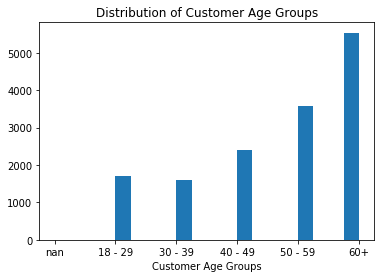

In [29]:
plt.hist(profile['age_group'],bins=20);
plt.xlabel("Customer Age Groups")
plt.title("Distribution of Customer Age Groups")

As shown above more than half of the costumers are adults.

##### Q2. Is the subscription program useful and used by customers?

Text(0.5,1,'Distribution of subscription over the years')

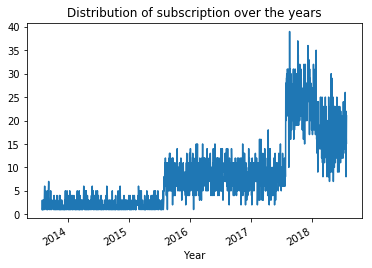

In [30]:
profile['became_member_on'].value_counts().plot()
plt.xlabel("Year")
plt.title("Distribution of subscription over the years")

As shown, the number of subscribers has increased over the years, so we can answer the question yes, the subscription program is useful and the offers from Starbucks are good.

##### Q3. What is the gender distribution for Starbucks customers?

Text(0.5,1,'Distribution of Genders')

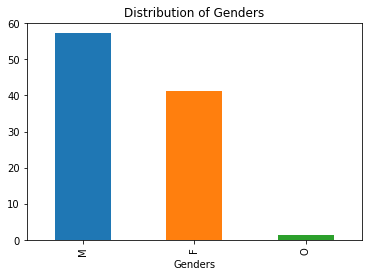

In [31]:
(profile['gender'].value_counts()/len(profile['gender'])*100).plot.bar()
plt.xlabel("Genders")
plt.title("Distribution of Genders")

As shown, female customers is greater than the males so Starbucks can offers tailored to women.

##### Q4. What is the relationship between the customer attributes?

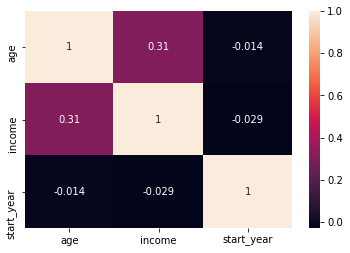

In [32]:
sns.heatmap(profile.corr(), annot = True);

As shown, there is a positive relationship between income and age, and opposite relationship between start year and age and incom. 

##### Q5. What age group affects Starbucks can income? 

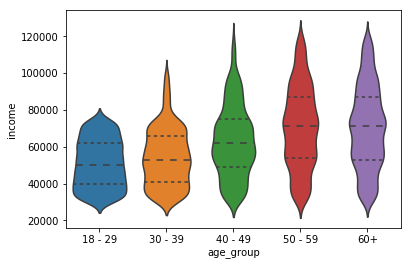

In [33]:
sns.violinplot(data = profile, x = 'age_group', y = 'income', inner = 'quartile');

##### Q6. What is the age and gender distribution in Starbucks customers?

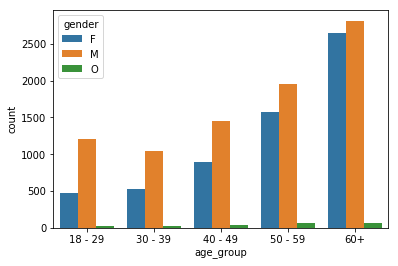

In [34]:
sns.countplot(data = profile, x = 'age_group', hue = 'gender');

As shown, Men of all age groups outnumber women.

##### Q7. What is the average age of Starbucks customers?

In [35]:
average_age = profile["age"].mean()
average_age

54.393524451939292

The average age is 55, this is unexpected.

##### Q8. What is the average income of Starbucks customers?

In [36]:
average_income = profile["income"].mean()
average_income

65404.991568296799

The average income is 65405, the income is high due to the high average age.

##### Q9. What is the number of Starbucks customers over the year?

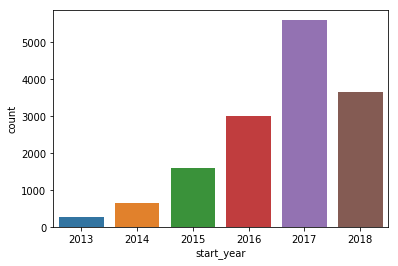

In [37]:
profile["start_year"].value_counts()
sns.countplot(profile["start_year"]);

As shown, in 2017, the number of customers increased, so the offers presented in that year can be improved due to its success.

##### Q10. What is the preferred offer type for Starbucks customers?

Text(0.5,1,'Distribution of Offer Types')

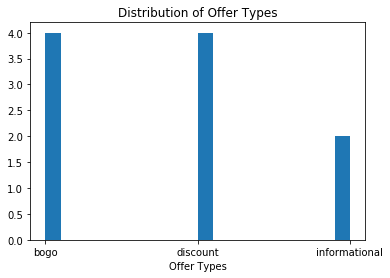

In [38]:
plt.hist(portfolio.offer_type ,bins=20);
plt.xlabel("Offer Types")
plt.title("Distribution of Offer Types")

As shown, the most popular type are Buy One Get One (BOGO) and Discount offers.

##### Q11. What is the offer event and gender distribution in Starbucks customers?

Text(0.5,1,'Offer Event and Gender Distribution')

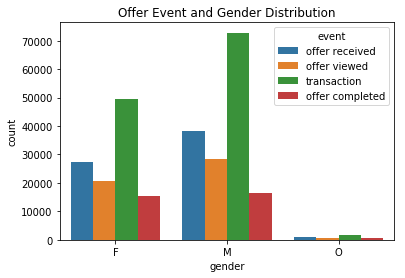

In [39]:
sns.countplot(x=transcript[transcript["gender"] != 'NA']['gender'], hue="event", data=transcript).set_title('Offer Event and Gender Distribution')

As shown, female tend to complete offers more than male. Focus on women in making offers, it is clear that they are complete their offers

## Modeling

After pre-processing step, start to implement model that predict whether the customer will respond to the offers or not.

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import GridSearchCV

Prepare the dateset, set the features variable and target column.

In [41]:
#split the data into features and target label
features=transcript[['time', 'offer_id', 'income', 'age_group',"offer_type"]]
target=transcript[['event']].values

Split the data into training and test sets.

In [42]:
#split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 0)

Standardize features.

In [43]:
#standardize features by removing the mean and scaling to unit variance
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

Since this is a basic classification problem, the models can be evaluated based on accuracy and classification report.

1. Logistic Regression classification algorithm

In [44]:
LG = LogisticRegression()
LG.fit(x_train, y_train)
print('Training set score: ', LG.score(x_train, y_train))
print('Testing set score: ',LG.score(x_test, y_test))
y_pred = LG.predict(x_test)
print(classification_report(y_test, y_pred))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set score:  0.701701644032
Testing set score:  0.70019186352
                 precision    recall  f1-score   support

offer completed       0.40      0.07      0.12      9786
 offer received       0.46      0.92      0.61     19669
   offer viewed       0.36      0.08      0.14     15095
    transaction       1.00      1.00      1.00     37279

    avg / total       0.68      0.70      0.64     81829



2. K-Nearest Neighbors classification algorithm

In [45]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print('Training set score: ', knn.score(x_train, y_train))
print('Testing set score: ' ,knn.score(x_test, y_test))
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Training set score:  0.84915127296
Testing set score:  0.787899155556
                 precision    recall  f1-score   support

offer completed       0.51      0.41      0.45      9786
 offer received       0.66      0.93      0.77     19669
   offer viewed       0.55      0.33      0.41     15095
    transaction       1.00      1.00      1.00     37279

    avg / total       0.78      0.79      0.77     81829



3. Decision Tree classification algorithm

In [46]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print('Training set score: ', dt.score(x_train, y_train))
print('Testing set score: ' ,dt.score(x_test, y_test))
y_pred = dt.predict(x_test)
print(classification_report(y_test, y_pred))

Training set score:  0.938056805267
Testing set score:  0.828398245121
                 precision    recall  f1-score   support

offer completed       0.48      0.50      0.49      9786
 offer received       0.82      0.94      0.87     19669
   offer viewed       0.60      0.47      0.53     15095
    transaction       1.00      1.00      1.00     37279

    avg / total       0.82      0.83      0.82     81829



4. Naive Bayes classification algorithm

In [47]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print('Training set score: ', gnb.score(x_train, y_train))
print('Testing set score: ' ,gnb.score(x_test, y_test))
y_pred = gnb.predict(x_test)
print(classification_report(y_test, y_pred))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set score:  0.699690467337
Testing set score:  0.697686639211
                 precision    recall  f1-score   support

offer completed       0.35      0.17      0.23      9786
 offer received       0.46      0.87      0.60     19669
   offer viewed       0.36      0.08      0.13     15095
    transaction       1.00      1.00      1.00     37279

    avg / total       0.67      0.70      0.65     81829



As it is clear, the most accurate model is Decision Tree classification algorithm, so it was chosen as Classifier for this data set.

# Conclusion

This project analyze, visualize and make prediction on the Starbucks customers data set.

First I clean the data. Then there is some exploratory analysis on the data set after cleaning.

From the exploratory analysis the most favorite type of offers are Buy One Get One and Discount offers. I go deep to see who and what type of customers Starbucks have, females tend to complete thier offers more than males they received. also, Starbucks is popular with the elderly, which was not expected. In addition, there was a huge rise in 2017, this could be come from a variety of factors, a strong economy, great advertisements during that season, and so on.

finally, starbucks should give more offers to females than males since they have more offer completion. And they should focus more on Buy One Get One and Discount offers since they are encourage the customers to buy more.

# improvement

In order to improve the outcomes, It's great to improve the data collection, try to add more features such as the place, transaction time and the branch thies can improve when and where Starbucks should make offers and it will improve the data set classifier.

In addition, If there is some unsupervised learning on clustering the customers based on this data set, to see if there are any specific characteristics on a group of customers to know who will be more likely to respond to the offers.